# Unity ML-Agents Toolkit
## Environment Basics
This notebook contains a walkthrough of the basic functions of the Python API for the Unity ML-Agents toolkit. For instructions on building a Unity environment, see [here](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Getting-Started-with-Balance-Ball.md).

### 1. Set environment parameters

Be sure to set `env_name` to the name of the Unity environment file you want to launch. Ensure that the environment build is in `../envs`.

In [68]:
env_name = "./envs/CameraLearningTestScene/autonomous-exploration-agent"  # Name of the Unity environment binary to launch
train_mode = True  # Whether to run the environment in training or inference mode

### 2. Load dependencies

The following loads the necessary dependencies and checks the Python version (at runtime). ML-Agents Toolkit (v0.3 onwards) requires Python 3.

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import sys
from pprint import pprint

from mlagents.envs.environment import UnityEnvironment

%matplotlib inline

print("Python version:")
print(sys.version)

# check Python version
if (sys.version_info[0] < 3):
    raise Exception("ERROR: ML-Agents Toolkit (v0.3 onwards) requires Python 3")

Python version:
3.6.8 (tags/v3.6.8:3c6b436a57, Dec 24 2018, 00:16:47) [MSC v.1916 64 bit (AMD64)]


### 3. Start the environment
`UnityEnvironment` launches and begins communication with the environment when instantiated.

Environments contain _brains_ which are responsible for deciding the actions of their associated _agents_. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [69]:
env = UnityEnvironment(file_name=env_name)

INFO:mlagents.envs:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 2
        Number of Training Brains : 1
        Reset Parameters :
		collision_penalty -> 0.30000001192092896
		num_obstacles -> 10.0
		ray_length -> 0.0
		win_reward -> 5.0
		collision_radius -> 2.0
		target_distance -> 45.0
		spawn_range -> 1.0
		time_penalty -> -0.0010000000474974513
		target_size -> 0.0
		min_reward -> -5.0
Unity brain name: CameraExAgentBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space size (per agent): 0
        Number of stacked Vector Observation: 10
        Vector Action space type: discrete
        Vector Action space size (per agent): [3, 3, 3]
        Vector Action descriptions: Forward Axis, Right Axis, Horizontal Rotation Axis
Unity brain name: CameraExAgentBrain_Player
        Number of Visual Observations (per agent): 1
        Vector Observation space size (per agent): 0
        Number of stacked Vector Obs

In [70]:
# Set the default brain to work with
default_brain = env.brain_names[0]
brain = env.brains[default_brain]

print("Current brain: \n{}".format(brain))

Current brain: 
Unity brain name: CameraExAgentBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space size (per agent): 0
        Number of stacked Vector Observation: 10
        Vector Action space type: discrete
        Vector Action space size (per agent): [3, 3, 3]
        Vector Action descriptions: Forward Axis, Right Axis, Horizontal Rotation Axis


### 4. Examine the observation and state spaces
We can reset the environment to be provided with an initial set of observations and states for all the agents within the environment. In ML-Agents, _states_ refer to a vector of variables corresponding to relevant aspects of the environment for an agent. Likewise, _observations_ refer to a set of relevant pixel-wise visuals for an agent.

In [71]:
# Attributes of env_info
pprint(dir(env_info))

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'action_masks',
 'agents',
 'custom_observations',
 'from_agent_proto',
 'local_done',
 'max_reached',
 'memories',
 'merge',
 'merge_memories',
 'previous_text_actions',
 'previous_vector_actions',
 'process_pixels',
 'rewards',
 'text_observations',
 'vector_observations',
 'visual_observations']


Number of observations :  1
Agent observations look like:


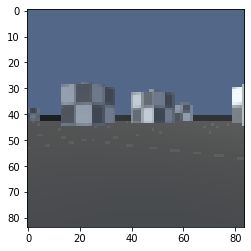

In [72]:
# Reset the environment
env_info = env.reset(train_mode=train_mode)[default_brain]

# Examine the number of observations per Agent
print("Number of observations : ", len(env_info.visual_observations))

# Examine the observation space for the default brain
for observation in env_info.visual_observations:
    print("Agent observations look like:")
    observation = np.array(observation)
    if observation.shape[3] == 3:
        plt.imshow(observation[0,:,:,:])
    else:
        plt.imshow(observation[0,:,:,0])

### 5. Take random actions in the environment
Once we restart an environment, we can step the environment forward and provide actions to all of the agents within the environment. Here we simply choose random actions based on the `action_space_type` of the default brain. 

Once this cell is executed, 10 messages will be printed that detail how much reward will be accumulated for the next 10 episodes. The Unity environment will then pause, waiting for further signals telling it what to do next. Thus, not seeing any animation is expected when running this cell.

In [73]:
for episode in range(10):
    env_info = env.reset(train_mode=train_mode)[default_brain]
    done = False
    episode_rewards = 0
    while not done:
        action_size = brain.vector_action_space_size
        
        # Discrete action
        action = np.column_stack([np.random.randint(0, action_size[i], size=(len(env_info.agents))) for i in range(len(action_size))])
        env_info = env.step(action)[default_brain]
        episode_rewards += env_info.rewards[0]
        done = env_info.local_done[0]
    print("Total reward this episode: {}".format(episode_rewards))

Total reward this episode: -5.0690004313364625
Total reward this episode: -5.00900040473789
Total reward this episode: -5.009000430814922
Total reward this episode: -5.059000411070883
Total reward this episode: -5.029000394977629
Total reward this episode: -5.009000342339277
Total reward this episode: -5.0090003833174706
Total reward this episode: 2.6709999535232782
Total reward this episode: -5.009000324644148
Total reward this episode: -5.069000392220914


### 6. Close the environment when finished
When we are finished using an environment, we can close it with the function below.

In [67]:
env.close()